In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import json
from pathlib import Path
import numpy as np

sns.set_theme(style="whitegrid")

Experiment 1 — Chunking impact (Iliad-only)

Goal: measure how chunk size & overlap affect retrieval on a single epic.

Why limit sources? Yes — limit to Iliad to remove cross-book noise and isolate chunking.

In [18]:
!python ../src/evaluation/experiment_chunking.py \
  --input ../data/raw/iliad.txt \
  --queries ../configs/queries_iliad.yaml \
  --out ../data/experiments/chunking/iliad_minilm/ \
  --embed_model sentence-transformers/all-MiniLM-L6-v2 \
  --sizes 200,300,500,650,800,900 \
  --overlaps 0,50,100,150 \
  --ks 3


[iliad] 200w/0ov → Hit@[3] ~ 0.95
[iliad] 200w/50ov → Hit@[3] ~ 1.00
[iliad] 200w/100ov → Hit@[3] ~ 0.95
[iliad] 200w/150ov → Hit@[3] ~ 1.00
[iliad] 300w/0ov → Hit@[3] ~ 1.00
[iliad] 300w/50ov → Hit@[3] ~ 1.00
[iliad] 300w/100ov → Hit@[3] ~ 0.95
[iliad] 300w/150ov → Hit@[3] ~ 1.00
[iliad] 500w/0ov → Hit@[3] ~ 1.00
[iliad] 500w/50ov → Hit@[3] ~ 1.00
[iliad] 500w/100ov → Hit@[3] ~ 1.00
[iliad] 500w/150ov → Hit@[3] ~ 1.00
[iliad] 650w/0ov → Hit@[3] ~ 0.95
[iliad] 650w/50ov → Hit@[3] ~ 1.00
[iliad] 650w/100ov → Hit@[3] ~ 1.00
[iliad] 650w/150ov → Hit@[3] ~ 1.00
[iliad] 800w/0ov → Hit@[3] ~ 1.00
[iliad] 800w/50ov → Hit@[3] ~ 1.00
[iliad] 800w/100ov → Hit@[3] ~ 1.00
[iliad] 800w/150ov → Hit@[3] ~ 0.95
[iliad] 900w/0ov → Hit@[3] ~ 1.00
[iliad] 900w/50ov → Hit@[3] ~ 0.95
[iliad] 900w/100ov → Hit@[3] ~ 1.00
[iliad] 900w/150ov → Hit@[3] ~ 1.00

✅ Saved summaries to ../data/experiments/chunking/iliad_minilm/


#### Dashboard views to inspect:

Aggregate (it’ll be single-book here):
- Hit@k vs Chunk Size
- MRR vs Chunk Size
- Index Size vs Accuracy
- Latency vs Accuracy

Expect:
- 200 → lower Hit@k (too fragmented).
- 300–500 → sweet spot.
- 800 → sometimes best for long-form epics.
- Overlap gives marginal gains but increases index size.

Experiment 2 — Chunking impact (Beowulf-only)

Goal: repeat on another epic to see if optimal chunk size changes.

Why limit sources? Yes — limit to Beowulf for clean within-book comparison.


In [12]:
!python ../src/evaluation/experiment_chunking.py \
  --input ../data/raw/beowulf.txt \
  --queries ../configs/queries_beowulf.yaml \
  --out ../data/experiments/chunking/beowulf_minilm/ \
  --embed_model sentence-transformers/all-MiniLM-L6-v2 \
  --sizes 200,300,500,650,800,900 \
  --overlaps 0,50,100,150 \
  --ks 3


[beowulf] 200w/0ov → Hit@[3] ~ 1.00
[beowulf] 200w/50ov → Hit@[3] ~ 1.00
[beowulf] 200w/100ov → Hit@[3] ~ 1.00
[beowulf] 200w/150ov → Hit@[3] ~ 1.00
[beowulf] 300w/0ov → Hit@[3] ~ 1.00
[beowulf] 300w/50ov → Hit@[3] ~ 1.00
[beowulf] 300w/100ov → Hit@[3] ~ 1.00
[beowulf] 300w/150ov → Hit@[3] ~ 1.00
[beowulf] 500w/0ov → Hit@[3] ~ 1.00
[beowulf] 500w/50ov → Hit@[3] ~ 1.00
[beowulf] 500w/100ov → Hit@[3] ~ 1.00
[beowulf] 500w/150ov → Hit@[3] ~ 1.00
[beowulf] 650w/0ov → Hit@[3] ~ 1.00
[beowulf] 650w/50ov → Hit@[3] ~ 1.00
[beowulf] 650w/100ov → Hit@[3] ~ 1.00
[beowulf] 650w/150ov → Hit@[3] ~ 1.00
[beowulf] 800w/0ov → Hit@[3] ~ 1.00
[beowulf] 800w/50ov → Hit@[3] ~ 1.00
[beowulf] 800w/100ov → Hit@[3] ~ 1.00
[beowulf] 800w/150ov → Hit@[3] ~ 1.00
[beowulf] 900w/0ov → Hit@[3] ~ 1.00
[beowulf] 900w/50ov → Hit@[3] ~ 1.00
[beowulf] 900w/100ov → Hit@[3] ~ 1.00
[beowulf] 900w/150ov → Hit@[3] ~ 1.00

✅ Saved summaries to ../data/experiments/chunking/beowulf_minilm/


Dashboard:
Open beowulf_minilm/ and compare the 4 main plots to the Iliad run.

Expect:
Similar shape; sometimes smaller chunks (300–500) do better if scenes are punchier.

Experiment 3 — Out-of-distribution (OOD) queries

Goal: see how retrieval scores look when the question isn’t in the corpus; calibrate an “I don’t know” trigger.

Why limit sources? Use Iliad-only first to cleanly separate in-scope vs OOD.

In [12]:
!python ../src/evaluation/experiment_chunking.py \
  --input ../data/raw/iliad.txt \
  --queries ../configs/queries_iliad_with_ood.yaml \
  --out ../data/experiments/chunking/iliad_ood_minilm/ \
  --embed_model sentence-transformers/all-MiniLM-L6-v2 \
  --sizes 300,500,800 \
  --overlaps 0,50,100 \
  --ks 3


[iliad] 300w/0ov → Hit@[3] ~ 0.94
[iliad] 300w/50ov → Hit@[3] ~ 0.97
[iliad] 300w/100ov → Hit@[3] ~ 0.91
[iliad] 500w/0ov → Hit@[3] ~ 0.97
[iliad] 500w/50ov → Hit@[3] ~ 0.97
[iliad] 500w/100ov → Hit@[3] ~ 0.94
[iliad] 800w/0ov → Hit@[3] ~ 0.97
[iliad] 800w/50ov → Hit@[3] ~ 0.97
[iliad] 800w/100ov → Hit@[3] ~ 0.94

✅ Saved summaries to ../data/experiments/chunking/iliad_ood_minilm/


In [ ]:
!python ../src/evaluation/hallucination_eval.py \
  --queries ../configs/queries_iliad_with_ood_small.yaml \
  --model llama3 \
  --k 3 \
  --threshold 0.65 \
  --out ../data/experiments/hallucination/multi_results.csv

Q: What role does Hera play in influencing the war?
Top score: 1.23 | Hallucinated: True
---
Q: How does Athena intervene in key battles?
Top score: 0.98 | Hallucinated: True
---
Q: What role does Apollo play in spreading plague in the Achaean camp?
Top score: 0.92 | Hallucinated: True
---
Q: How are women like Helen, Andromache, and Briseis portrayed in the Iliad?
Top score: 0.86 | Hallucinated: True
---
Q: What is the significance of the Catalogue of Ships?
Top score: 1.22 | Hallucinated: True
---
Q: How does the Iliad portray the brutality of war?
Top score: 0.81 | Hallucinated: False
---
Q: Who is Beowulf and what are his key heroic deeds?
Top score: 0.66 | Hallucinated: True
---
Q: How does Beowulf defeat Grendel?
Top score: 0.65 | Hallucinated: True
---
Q: What is the role of Hrothgar in Beowulf?
Top score: 0.64 | Hallucinated: True
---
Q: Describe the battle between Beowulf and Grendel’s mother.
Top score: 0.61 | Hallucinated: True
---

✅ Saved hallucination eval results to ../d

Dashboard:
Similarity Histograms → “Cosine Similarity: In vs Out of Corpus”

Expect:
In-corpus top scores cluster high; OOD scores lower and diffuse → lets you pick a similarity threshold (e.g., τ ≈ 0.6–0.7) to refuse/abstain.

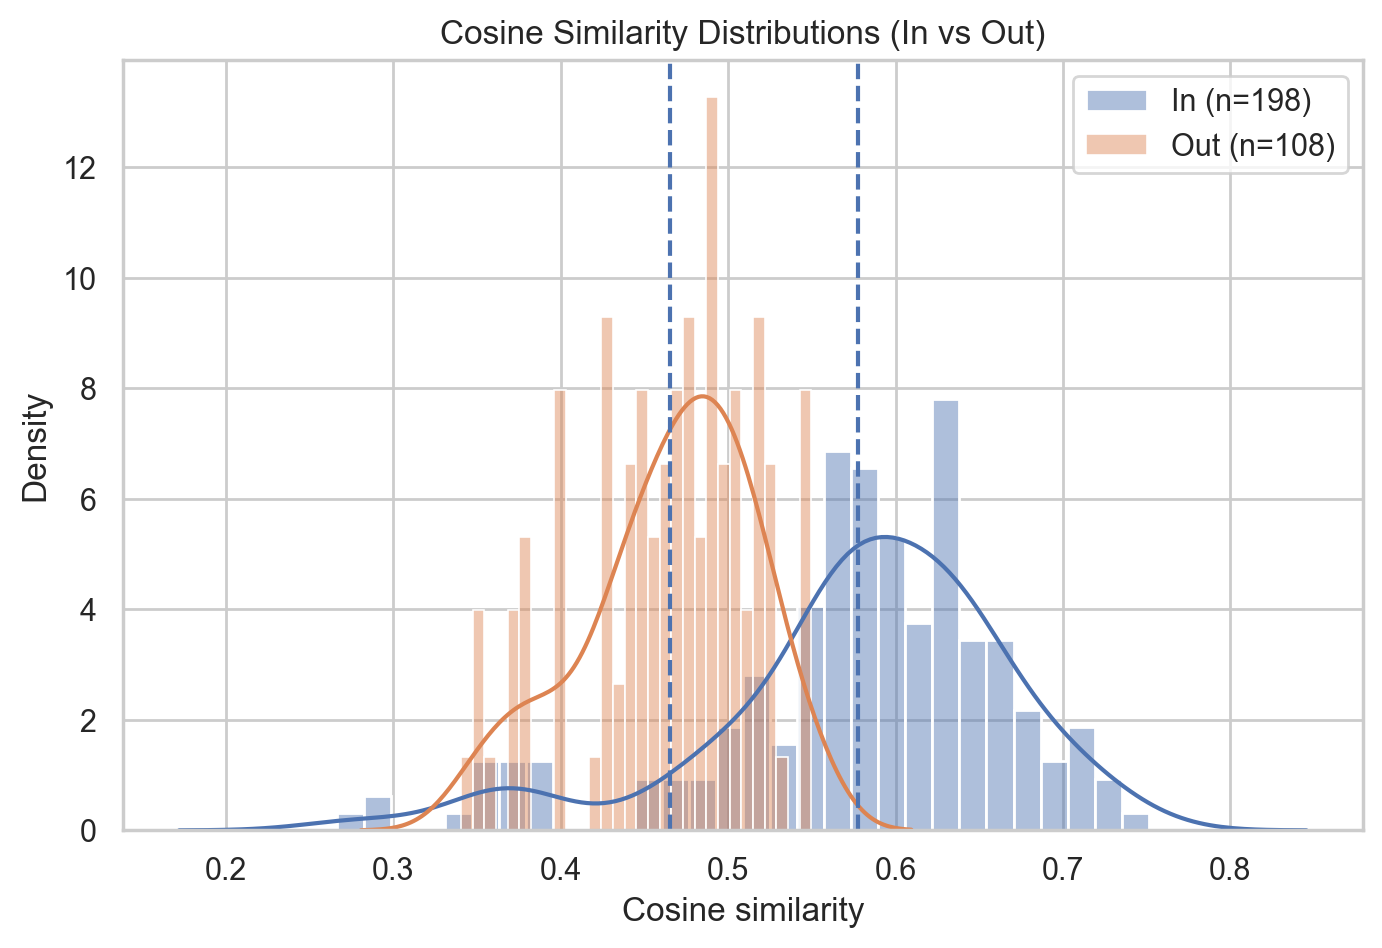

1. The plot

Blue (In-distribution, n=198)
Peaks around 0.55–0.65 cosine similarity. Distribution is shifted to the right (higher similarity).

Orange (Out-of-distribution, n=108)
Peaks around 0.40–0.45. Much lower on average, and narrower.

The dashed vertical lines are the group means. They don’t overlap much, which is visually strong separation.

KDE curves confirm the separation: two distinct “humps” with little overlap.

👉 This means your retriever is indeed assigning higher similarity scores to in-distribution queries than to OOD queries.

2. Statistical tests

KS test p-value = 0.0000
The Kolmogorov–Smirnov test says the two distributions are not from the same underlying distribution. The difference is highly significant (p ≪ 0.05).

Welch’s t-test p-value = 0.0000
Confirms the means are significantly different (again p ≪ 0.05).

Cohen’s d = 1.426
This is the effect size (in units of pooled standard deviation).

0.2 = small effect

0.5 = medium

0.8 = large

1.2 = very large
So at 1.426, this is an extremely strong separation between in vs OOD similarities.

3. Interpretation for your RAG experiment

✅ Your retriever is well-calibrated: in-corpus queries consistently get higher similarity than out-of-corpus.

✅ This is exactly what you want if you’re building an “I don’t know” filter, because the distributions are separable.

⚖️ The next step is to pick a threshold for cosine similarity where you decide:

Above threshold → return an answer

Below threshold → “I don’t know”

For example:

If you set threshold ~0.50, almost all in-distribution queries will be above it, while most out-of-distribution ones will fall below.

You can tune this by plotting ROC curves or precision/recall tradeoffs with your scores.

Experiment 4 — Effect of k (depth of retrieval)

Goal: find where precision plateaus; more context ≠ better.

Why limit sources? Use Iliad-only to avoid cross-book confounds.

In [14]:
!python ../src/evaluation/experiment_chunking.py \
  --input ../data/raw/iliad.txt \
  --queries ../configs/queries_iliad.yaml \
  --out ../data/experiments/chunking/iliad_k_sweep_minilm/ \
  --embed_model sentence-transformers/all-MiniLM-L6-v2 \
  --sizes 200,300,500,800,900 \
  --overlaps 0,50,100,150 \
  --ks 1,2,3,5,10


[iliad] 200w/0ov → Hit@[1, 2, 3, 5, 10] ~ 1.00
[iliad] 200w/50ov → Hit@[1, 2, 3, 5, 10] ~ 1.00
[iliad] 200w/100ov → Hit@[1, 2, 3, 5, 10] ~ 1.00
[iliad] 200w/150ov → Hit@[1, 2, 3, 5, 10] ~ 1.00
[iliad] 300w/0ov → Hit@[1, 2, 3, 5, 10] ~ 1.00
[iliad] 300w/50ov → Hit@[1, 2, 3, 5, 10] ~ 1.00
[iliad] 300w/100ov → Hit@[1, 2, 3, 5, 10] ~ 1.00
[iliad] 300w/150ov → Hit@[1, 2, 3, 5, 10] ~ 1.00
[iliad] 500w/0ov → Hit@[1, 2, 3, 5, 10] ~ 1.00
[iliad] 500w/50ov → Hit@[1, 2, 3, 5, 10] ~ 1.00
[iliad] 500w/100ov → Hit@[1, 2, 3, 5, 10] ~ 1.00
[iliad] 500w/150ov → Hit@[1, 2, 3, 5, 10] ~ 1.00
[iliad] 800w/0ov → Hit@[1, 2, 3, 5, 10] ~ 1.00
[iliad] 800w/50ov → Hit@[1, 2, 3, 5, 10] ~ 1.00
[iliad] 800w/100ov → Hit@[1, 2, 3, 5, 10] ~ 1.00
[iliad] 800w/150ov → Hit@[1, 2, 3, 5, 10] ~ 1.00
[iliad] 900w/0ov → Hit@[1, 2, 3, 5, 10] ~ 1.00
[iliad] 900w/50ov → Hit@[1, 2, 3, 5, 10] ~ 1.00
[iliad] 900w/100ov → Hit@[1, 2, 3, 5, 10] ~ 1.00
[iliad] 900w/150ov → Hit@[1, 2, 3, 5, 10] ~ 1.00

✅ Saved summaries to ../data/exper

Dashboard:
- Precision@k Curve (Hit@k vs k)
- MRR vs Chunk Size (check if bigger chunks change the optimal k)

Expect:
Big jump k=1→2; modest k=2→3; plateau or drop after k>3 (noise creeps in).

Experiment 5 — Cross-book queries (multi-book disambiguation)

Goal: test if retriever pulls from the right book when similar entities/topics exist.

Why limit sources? No — here we enable multiple books to stress disambiguation.

Queries: Make a multi-book file (e.g., queries_multi_myths.yaml) with prompts like:

“Which epic poem tells of the Trojan War?” (Iliad vs others)

“Who fought the dragon: Beowulf or Achilles?”

“What trials did Odysseus face?” (should avoid Iliad/Aeneid)

In [26]:
!python ../src/evaluation/experiment_chunking.py \
  --input ../data/raw/ \
  --queries ../configs/queries_iliad_with_ood.yaml \
  --out ../data/experiments/chunking/multibook_minilm/ \
  --embed_model sentence-transformers/all-MiniLM-L6-v2 \
  --sizes 200,300,500,800 \
  --overlaps 0,50,150 \
  --ks 3


[aeneid] 200w/0ov → Hit@[3] ~ 0.85
[aeneid] 200w/50ov → Hit@[3] ~ 0.76
[aeneid] 200w/150ov → Hit@[3] ~ 0.79
[aeneid] 300w/0ov → Hit@[3] ~ 0.85
[aeneid] 300w/50ov → Hit@[3] ~ 0.85
[aeneid] 300w/150ov → Hit@[3] ~ 0.76
[aeneid] 500w/0ov → Hit@[3] ~ 0.91
[aeneid] 500w/50ov → Hit@[3] ~ 0.85
[aeneid] 500w/150ov → Hit@[3] ~ 0.91
[aeneid] 800w/0ov → Hit@[3] ~ 0.88
[aeneid] 800w/50ov → Hit@[3] ~ 0.91
[aeneid] 800w/150ov → Hit@[3] ~ 0.94
[beowulf] 200w/0ov → Hit@[3] ~ 0.74
[beowulf] 200w/50ov → Hit@[3] ~ 0.76
[beowulf] 200w/150ov → Hit@[3] ~ 0.74
[beowulf] 300w/0ov → Hit@[3] ~ 0.79
[beowulf] 300w/50ov → Hit@[3] ~ 0.74
[beowulf] 300w/150ov → Hit@[3] ~ 0.76
[beowulf] 500w/0ov → Hit@[3] ~ 0.79
[beowulf] 500w/50ov → Hit@[3] ~ 0.82
[beowulf] 500w/150ov → Hit@[3] ~ 0.82
[beowulf] 800w/0ov → Hit@[3] ~ 0.79
[beowulf] 800w/50ov → Hit@[3] ~ 0.88
[beowulf] 800w/150ov → Hit@[3] ~ 0.82
[iliad] 200w/0ov → Hit@[3] ~ 0.85
[iliad] 200w/50ov → Hit@[3] ~ 0.91
[iliad] 200w/150ov → Hit@[3] ~ 0.94
[iliad] 300w/0ov → 

Dashboard:

Aggregate plots

Per-book plots (check if wrong-book hits spike at certain chunk sizes)

(If you used the [SOURCE: <book>] prefix, sanity-check the pulled chunks)

Expect:

Cross-book confusion rises with very small chunks (keywords split) or very large chunks (topics blend).

This experiment will highlight why metadata filtering is valuable in Phase 2.

In [4]:
!python ../src/evaluation/hallucination_eval.py \
  --queries ../configs/queries_iliad.yaml \
  --model mistral \
  --k 3 \
  --out ../data/experiments/hallucination/iliad_results.csv


Q: Who is Achilles and why is he important in the Iliad?
Hallucinated: True
---
Q: What causes the quarrel between Agamemnon and Achilles?
Hallucinated: True
---
Q: Describe the role of Hector in the Trojan War.
Hallucinated: True
---
Q: What is the significance of Patroclus in the Iliad?
Hallucinated: True
---
Q: How does the Iliad portray the will of the gods and fate?
Hallucinated: True
---
Q: What happens during the duel between Paris and Menelaus?
Hallucinated: True
---
Q: Why does Achilles refuse to fight, and what brings him back?
Hallucinated: True
---
Q: What role do the gods play in the outcome of battles?
Hallucinated: True
---
Q: What is the importance of the armor and shield of Achilles?
Hallucinated: False
---
Q: What is the significance of the death of Patroclus?
Hallucinated: True
---
Q: What are the funeral games for Patroclus and their meaning?
Hallucinated: True
---
^C/python3.12/site-packages/ollama/_client.py", line 351, in chat

  File "/opt/miniconda3/envs/mythic

In [9]:
!python ../src/evaluation/hallucination_eval.py \
  --queries ../configs/queries_iliad_with_ood.yaml \
  --model llama3 \
  --k 3 \
  --threshold 0.65 \
  --out ../data/experiments/hallucination/multi_results.csv


Q: Who is Achilles and why is he important in the Iliad?
Top score: 0.61 | Hallucinated: True
---
Q: What causes the quarrel between Agamemnon and Achilles?
Top score: 0.70 | Hallucinated: True
---
Q: Describe the role of Hector in the Trojan War.
Top score: 0.54 | Hallucinated: True
---
Q: What is the significance of Patroclus in the Iliad?
Top score: 0.73 | Hallucinated: True
---
Q: How does the Iliad portray the will of the gods and fate?
Top score: 0.82 | Hallucinated: True
---
Q: What happens during the duel between Paris and Menelaus?
Top score: 0.98 | Hallucinated: True
---
Q: Why does Achilles refuse to fight, and what brings him back?
Top score: 0.72 | Hallucinated: True
---
Q: What role do the gods play in the outcome of battles?
Top score: 0.87 | Hallucinated: True
---
Q: What is the importance of the armor and shield of Achilles?
Top score: 0.86 | Hallucinated: True
---
Q: What is the significance of the death of Patroclus?
Top score: 0.89 | Hallucinated: True
---
Q: What a